# Diplom

In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

import scipy.spatial.distance as ds
from numpy import linalg as LA

## Задание.1a COSINE

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [26]:
M=[]
for i in range(10):
    a = []
    for j in range(10):
        if i==j:
            a.append(0)
        else:
            a.append(1-ds.cosine(raitings[i], raitings[j]))
    M.append(a)
    print(max(a))

0.9106598233573044
0.871380522393023
0.9187305147356806
0.8588686958710953
0.8794847716076254
0.8551490764118893
0.8327421070557632
0.8445168512565343
0.9106598233573044
0.9187305147356806


In [36]:
total=[]
for i in range(10):
    for j in range(10):
        if M[i][j]==max(M[i]):
            total.append([i,j])
        else:
            0
total

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

## Задание.1b Matrix

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(raitings)
x_pca = pd.DataFrame(x_pca)
x_pca

,0,1,2,3,4,5,6,7,8,9
0,-5.309861,1.929198,-4.933000,2.701880,5.504979,-2.340872,1.714562,-1.688175,-1.408826,1.168101e-15
1,2.877634,2.716596,1.405928,7.263258,-4.503223,-2.511456,2.645279,0.136335,1.230963,1.168101e-15
2,-4.940104,-6.688612,-0.945502,3.615567,-0.689693,2.963462,-3.320806,-1.728666,1.236011,1.168101e-15
3,5.149399,-6.280273,-4.659786,1.090240,-1.014711,-0.483501,-0.800799,3.133933,-1.386871,1.168101e-15
4,-1.374887,7.543580,4.008344,2.128400,-0.163249,5.138920,-1.337700,1.016808,-1.502895,1.168101e-15
5,2.653420,-3.770756,8.584307,-1.466283,1.674018,-4.258852,-1.257002,-0.940452,-0.897655,1.168101e-15
6,8.615739,3.786033,-4.027210,-4.375826,-3.138803,0.447813,-1.059804,-2.642710,-0.137814,1.168101e-15
7,5.396583,-1.017047,1.014567,-1.895128,6.548835,3.120907,2.244119,0.742532,1.765481,1.168101e-15
8,-5.784349,5.298571,-1.480836,-3.712955,0.213127,-3.689497,-2.491632,1.982844,1.483182,1.168101e-15
9,-7.283574,-3.517291,1.033188,-5.349152,-4.431280,1.613076,3.663783,-0.012450,-0.381577,1.168101e-15


In [72]:
U, s, V = np.linalg.svd(raitings)
n_component = 5
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
#print(A)
#plt.matshow(V)
V

array([[-0.21405828, -0.21840724, -0.28094089, -0.27089744, -0.27753803,
        -0.33436988, -0.23625383, -0.26374578, -0.26327297, -0.24061219,
        -0.23308063, -0.22640326, -0.25914256, -0.29644507, -0.22831862],
       [ 0.4711451 , -0.11583642, -0.15447585,  0.12846167,  0.20826825,
         0.26623786,  0.09247124, -0.35181157, -0.43830412, -0.21293113,
         0.0309848 ,  0.20696731, -0.28012323,  0.28744485, -0.18793403],
       [-0.15528326,  0.1656679 , -0.27689444, -0.10636915, -0.02375853,
        -0.10980787,  0.59002199, -0.00103523, -0.21990936,  0.11812879,
         0.08077066, -0.51123982,  0.16497278,  0.36898114, -0.07835426],
       [ 0.04111448, -0.08645631, -0.17472159, -0.21714723,  0.11094411,
        -0.10060368, -0.16112759,  0.24968758,  0.02671233,  0.32369026,
        -0.65471537,  0.24256284,  0.08268793,  0.41637486, -0.17098382],
       [ 0.13790566, -0.28244791, -0.00656714,  0.31020762, -0.15018655,
         0.08592085,  0.37362912, -0.065269  , 

## Задание 2 Производная

In [79]:
from sympy import *
x = symbols('x')
tan(sin(x) + cos(2*x+3))**2

tan(sin(x) + cos(2*x + 3))**2

In [81]:
dev = diff(tan(sin(x) + cos(2*x+3))**2)
print(dev)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [87]:
def fun(x):
    return(2*(-2*np.sin(2*x + 3) + np.cos(x))*(np.tan(np.sin(x) + np.cos(2*x + 3))**2 + 1)*np.tan(np.sin(x) + np.cos(2*x + 3)))

fun(1)

55.385917635337854

## Задание 3 Оптимизация

In [93]:
from scipy.optimize import approx_fprime
from scipy.optimize import differential_evolution

In [88]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [89]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [90]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

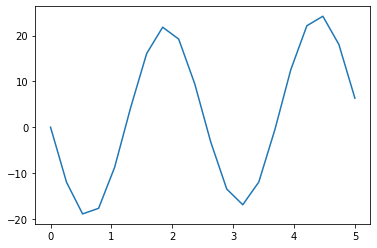

In [91]:
plt.plot(x, fx)
plt.show()

In [92]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [94]:
bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

## Задание 4 Теория вероятности

In [37]:
a = np.random.choice(10,20)
a.mean()

5.05

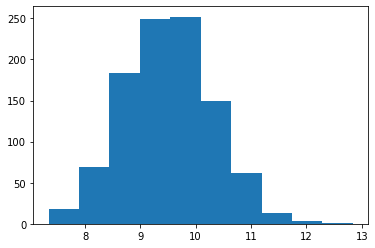

In [39]:
average = []
for i in range(1000):
    average.append(np.random.choice(20,50).mean())
    
plt.hist(average)
plt.show()

## Задание 5 Матрица

In [3]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [8]:
#собственный вектор, собственное значение матрицы
w,v = LA.eig(m)
print(w)
print(v)

[ 3. -1.]
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
